# Import thư viện

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
import os
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

import warnings
warnings.filterwarnings("ignore")

print("Import success!!!")

Import success!!!


In [2]:
!nvidia-smi

Mon Oct 27 15:08:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P0             25W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
print("GPU available:", tf.config.list_physical_devices('GPU'))

GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Load data

In [6]:
url_train = "/kaggle/input/pneumonia/dataset/train"
url_test = "/kaggle/input/pneumonia/dataset/test"
url_val = "/kaggle/input/pneumonia/dataset/val"

print("Đường dẫn đến tập train:", url_train)
print("Đường dẫn đến tập test:", url_test)
print("Đường dẫn đến tập val:", url_val)

Đường dẫn đến tập train: /kaggle/input/pneumonia/dataset/train
Đường dẫn đến tập test: /kaggle/input/pneumonia/dataset/test
Đường dẫn đến tập val: /kaggle/input/pneumonia/dataset/val


In [7]:
# Đếm số lượng ảnh trong mỗi thư mục con (NORMAL/PNEUMONIA) của từng tập dữ liệu

# Tập Train
num_normal_train = len(os.listdir(os.path.join(url_train, 'NORMAL')))
num_virus_train = len(os.listdir(os.path.join(url_train, 'virus')))
num_bacteria_train = len(os.listdir(os.path.join(url_train, 'bacteria')))

# Tập Test
num_normal_test = len(os.listdir(os.path.join(url_test, 'NORMAL')))
num_virus_test = len(os.listdir(os.path.join(url_test, 'virus')))
num_bacteria_test = len(os.listdir(os.path.join(url_test, 'bacteria')))

# Tập Val
num_normal_val = len(os.listdir(os.path.join(url_val, 'NORMAL')))
num_virus_val = len(os.listdir(os.path.join(url_val, 'virus')))
num_bacteria_val = len(os.listdir(os.path.join(url_val, 'bacteria')))


print("Tập Huấn Luyện")
print(f"Số ảnh NORMAL: {num_normal_train}")
print(f"Số ảnh virus: {num_virus_train}")
print(f"Số ảnh vi khuẩn: {num_bacteria_train}")
print("_" * 20)
print("Tập Kiểm Tra")
print(f"Số ảnh NORMAL: {num_normal_test}")
print(f"Số ảnh virus: {num_virus_test}")
print(f"Số ảnh vi khuẩn: {num_bacteria_test}")
print("_" * 20)
print("Tập Kiểm Định")
print(f"Số ảnh NORMAL: {num_normal_val}")
print(f"Số ảnh virus: {num_virus_val}")
print(f"Số ảnh vi khuẩn: {num_bacteria_val}")

Tập Huấn Luyện
Số ảnh NORMAL: 1341
Số ảnh virus: 1345
Số ảnh vi khuẩn: 2530
____________________
Tập Kiểm Tra
Số ảnh NORMAL: 234
Số ảnh virus: 148
Số ảnh vi khuẩn: 242
____________________
Tập Kiểm Định
Số ảnh NORMAL: 24
Số ảnh virus: 6
Số ảnh vi khuẩn: 17


In [8]:
url = url_train

data = []
for root, dirs, files in os.walk(url):
    for file in files:
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            label = os.path.basename(root)  # tên thư mục là nhãn
            data.append({
                'filepath': os.path.join(root, file),
                'label': label
            })
    
df = pd.DataFrame(data)
print(df['label'].value_counts())

label
bacteria    2530
virus       1345
NORMAL      1341
Name: count, dtype: int64


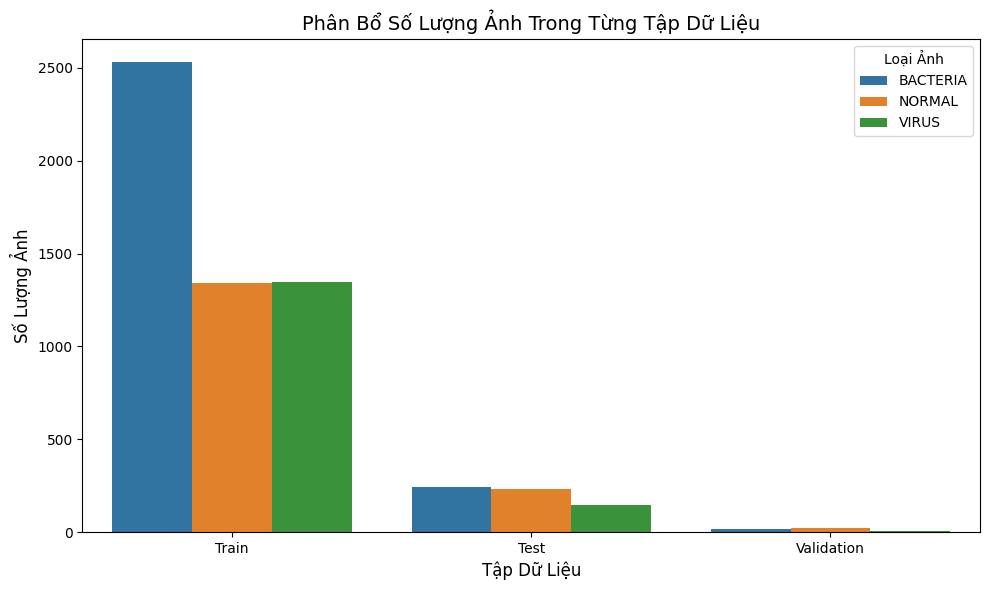

In [9]:
# Tạo DataFrame để vẽ biểu đồ
data_counts = {
    'Tập Dữ Liệu': [
        'Train', 'Train', 'Train',
        'Test', 'Test', 'Test',
        'Validation', 'Validation', 'Validation'
    ],
    'Lớp': [
        'BACTERIA', 'NORMAL', 'VIRUS',
        'BACTERIA', 'NORMAL', 'VIRUS',
        'BACTERIA', 'NORMAL', 'VIRUS',
    ],
    'Số Lượng': [
        num_bacteria_train, num_normal_train, num_virus_train,
        num_bacteria_test, num_normal_test, num_virus_test,
        num_bacteria_val, num_normal_val, num_virus_val
    ]
}


df_counts = pd.DataFrame(data_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x='Tập Dữ Liệu', y='Số Lượng', hue='Lớp', data=df_counts)

plt.title('Phân Bổ Số Lượng Ảnh Trong Từng Tập Dữ Liệu', fontsize=14)
plt.xlabel('Tập Dữ Liệu', fontsize=12)
plt.ylabel('Số Lượng Ảnh', fontsize=12)
plt.legend(title='Loại Ảnh')
plt.tight_layout()
plt.show()

Các ảnh mẫu của lớp NORMAL:


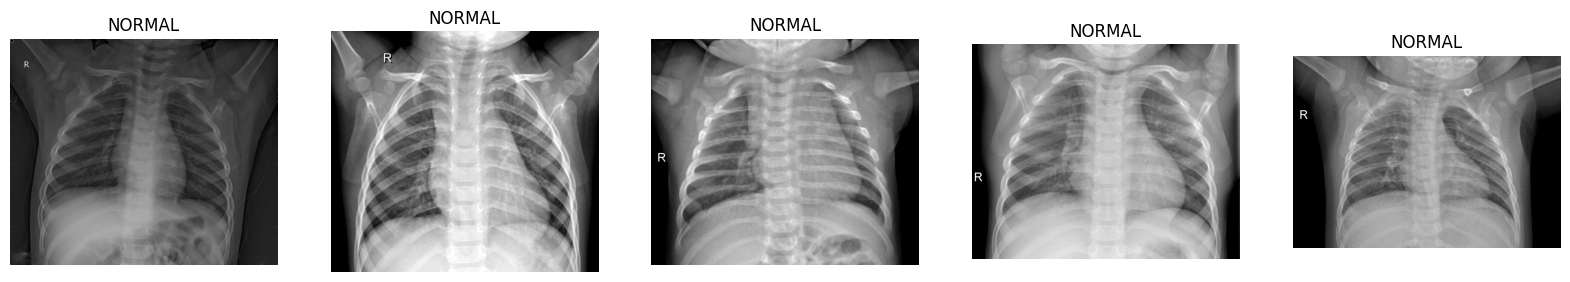


Các ảnh mẫu của lớp BACTERIA:


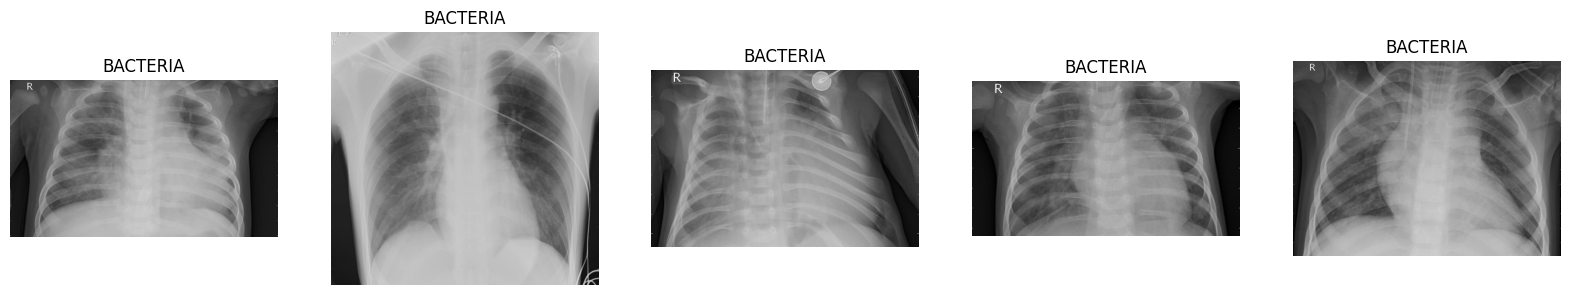


Các ảnh mẫu của lớp VIRUS:


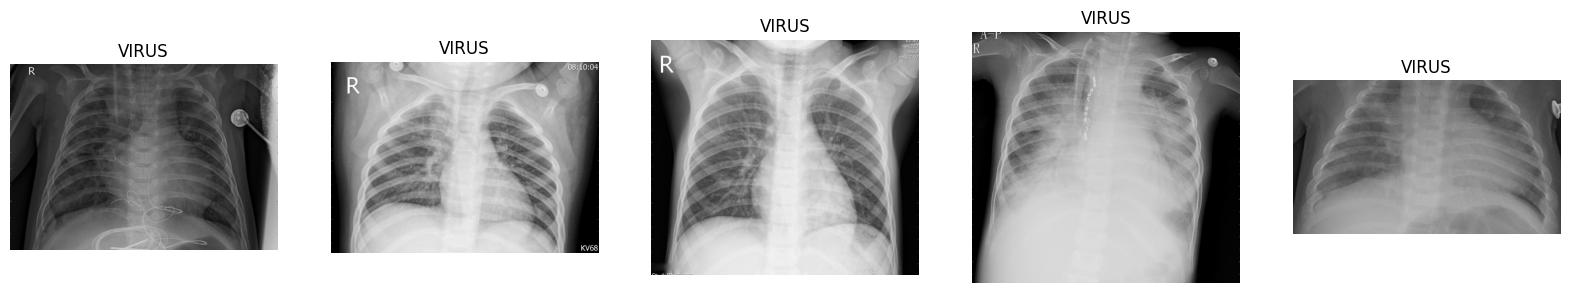

In [10]:
# Lấy 5 ảnh đầu tiên từ mỗi lớp
normal_images = os.listdir(os.path.join(url_train, 'NORMAL'))[:5]
bacteria_images = os.listdir(os.path.join(url_train, 'bacteria'))[:5]
virus_images = os.listdir(os.path.join(url_train, 'virus'))[:5]

# Hiển thị ảnh NORMAL
print("Các ảnh mẫu của lớp NORMAL:")
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, img_name in enumerate(normal_images):
    img_path = os.path.join(url_train, 'NORMAL', img_name)
    img = plt.imread(img_path)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title('NORMAL')
    axes[i].axis('off')
plt.show()

# Hiển thị ảnh BACTERIA
print("\nCác ảnh mẫu của lớp BACTERIA:")
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, img_name in enumerate(bacteria_images):
    img_path = os.path.join(url_train, 'bacteria', img_name)
    img = plt.imread(img_path)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title('BACTERIA')
    axes[i].axis('off')
plt.show()

# Hiển thị ảnh VIRUS
print("\nCác ảnh mẫu của lớp VIRUS:")
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, img_name in enumerate(virus_images):
    img_path = os.path.join(url_train, 'virus', img_name)
    img = plt.imread(img_path)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title('VIRUS')
    axes[i].axis('off')
plt.show()

# Thiết lập thông số chung

In [11]:
EPOCHS = 20
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Traing mô hình với Transfer learning

## DenseNet121

In [12]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Lấy file từ thư mục train
normal_dir = os.path.join(url_train, "NORMAL")
bacteria_dir = os.path.join(url_train, "bacteria")
virus_dir = os.path.join(url_train, "virus")

normal_files = [os.path.join(normal_dir, f) for f in os.listdir(normal_dir)]
bacteria_files = [os.path.join(bacteria_dir, f) for f in os.listdir(bacteria_dir)]
virus_files = [os.path.join(virus_dir, f) for f in os.listdir(virus_dir)]

# Gắn nhãn cho từng ảnh
all_filepaths = normal_files + bacteria_files + virus_files
all_labels = (
    ["NORMAL"] * len(normal_files)
    + ["BACTERIA"] * len(bacteria_files)
    + ["VIRUS"] * len(virus_files)
)

# Chia train / val (80/20)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    all_filepaths, all_labels, test_size=0.2, stratify=all_labels, random_state=42
)

# Tạo DataFrame
train_df = pd.DataFrame({'filepath': train_paths, 'label': train_labels})
val_df = pd.DataFrame({'filepath': val_paths, 'label': val_labels})

# Tạo test_df
normal_test = [os.path.join(url_test, "NORMAL", f) for f in os.listdir(os.path.join(url_test, "NORMAL"))]
bacteria_test = [os.path.join(url_test, "bacteria", f) for f in os.listdir(os.path.join(url_test, "bacteria"))]
virus_test = [os.path.join(url_test, "virus", f) for f in os.listdir(os.path.join(url_test, "virus"))]

test_df = pd.DataFrame({
    'filepath': normal_test + bacteria_test + virus_test,
    'label': (
        ['NORMAL'] * len(normal_test)
        + ['BACTERIA'] * len(bacteria_test)
        + ['VIRUS'] * len(virus_test)
    )
})

# Kiểm tra phân bố
print("--- Train/Val/Test phân bổ ---")
print(train_df['label'].value_counts(), "\n")
print(val_df['label'].value_counts(), "\n")
print(test_df['label'].value_counts())

--- Train/Val/Test phân bổ ---
label
BACTERIA    2024
VIRUS       1076
NORMAL      1072
Name: count, dtype: int64 

label
BACTERIA    506
NORMAL      269
VIRUS       269
Name: count, dtype: int64 

label
BACTERIA    242
NORMAL      234
VIRUS       148
Name: count, dtype: int64


In [14]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True
)


val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    class_weight={'NORMAL': 1.5, 'BACTERIA': 0.8, 'VIRUS': 1.7}
)


val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = val_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 4172 validated image filenames belonging to 3 classes.
Found 1044 validated image filenames belonging to 3 classes.
Found 624 validated image filenames belonging to 3 classes.


In [15]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # đóng băng

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

I0000 00:00:1761577874.245840      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_lr=1e-6)
early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [17]:
print("\nGIAI ĐOẠN 1: FEATURE EXTRACTION")
history1 = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=[lr_reducer, early_stopper]
)


GIAI ĐOẠN 1: FEATURE EXTRACTION
Epoch 1/20


I0000 00:00:1761577914.287827     115 service.cc:148] XLA service 0x7c3e480028c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761577914.288518     115 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1761577917.043616     115 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/131 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.3203 - loss: 1.9970    

I0000 00:00:1761577927.452730     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


131/131 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.4087 - loss: 1.4559 - val_accuracy: 0.7050 - val_loss: 0.7469 - learning_rate: 5.0000e-05
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 83s 634ms/step - accuracy: 0.6393 - loss: 0.8274 - val_accuracy: 0.7270 - val_loss: 0.6711 - learning_rate: 5.0000e-05
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 83s 637ms/step - accuracy: 0.6964 - loss: 0.7006 - val_accuracy: 0.7443 - val_loss: 0.6236 - learning_rate: 5.0000e-05
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 84s 641ms/step - accuracy: 0.7190 - loss: 0.6647 - val_accuracy: 0.7462 - val_loss: 0.6138 - learning_rate: 5.0000e-05
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 85s 647ms/step - accuracy: 0.7248 - loss: 0.6361 - val_accuracy: 0.7557 - val_loss: 0.5862 - learning_rate: 5.0000e-05
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 84s 639ms/step - accuracy: 0.7543 - loss: 0.5894 - val_accuracy: 0.7711 - val_loss: 0.5626 - learning_rate: 5.0000e-05
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 82s 627ms/step - ac

In [18]:
print("\nGIAI ĐOẠN 2: FINE-TUNING")

base_model.trainable = True
for layer in base_model.layers[:-150]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


trainable_layers = sum([layer.trainable for layer in base_model.layers])
print(f"Số layer thực sự trainable sau khi mở: {trainable_layers}/{len(base_model.layers)}")

history2 = model.fit(
    train_gen,
    epochs=EPOCHS + history1.epoch[-1] + 1,
    initial_epoch=history1.epoch[-1] + 1,
    validation_data=val_gen,
    callbacks=[lr_reducer, early_stopper]
)



GIAI ĐOẠN 2: FINE-TUNING
Số layer thực sự trainable sau khi mở: 150/427
Epoch 21/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 203s 980ms/step - accuracy: 0.6572 - loss: 0.7428 - val_accuracy: 0.7663 - val_loss: 0.5588 - learning_rate: 1.0000e-05
Epoch 22/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 82s 628ms/step - accuracy: 0.7745 - loss: 0.5406 - val_accuracy: 0.7797 - val_loss: 0.5189 - learning_rate: 1.0000e-05
Epoch 23/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 82s 626ms/step - accuracy: 0.7757 - loss: 0.4995 - val_accuracy: 0.7845 - val_loss: 0.5045 - learning_rate: 1.0000e-05
Epoch 24/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 83s 635ms/step - accuracy: 0.7940 - loss: 0.4753 - val_accuracy: 0.7874 - val_loss: 0.4889 - learning_rate: 1.0000e-05
Epoch 25/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 83s 634ms/step - accuracy: 0.8007 - loss: 0.4770 - val_accuracy: 0.7989 - val_loss: 0.4752 - learning_rate: 1.0000e-05
Epoch 26/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 83s 636ms/step - accuracy: 0.8048 - loss: 0.4615 - val_accuracy: 0.7998 - val_loss: 0

In [19]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"\nĐộ chính xác trên tập test: {test_acc*100:.2f}%")
print(f"Mất mát: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 958ms/step - accuracy: 0.7400 - loss: 0.8702

Độ chính xác trên tập test: 79.97%
Mất mát: 0.6388


20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 882ms/step


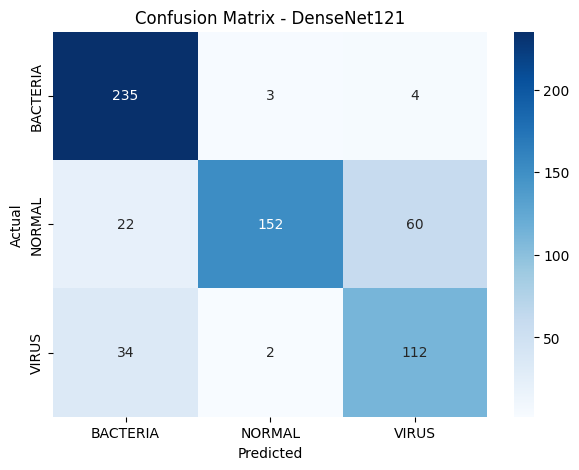


Classification Report:

              precision    recall  f1-score   support

    BACTERIA       0.81      0.97      0.88       242
      NORMAL       0.97      0.65      0.78       234
       VIRUS       0.64      0.76      0.69       148

    accuracy                           0.80       624
   macro avg       0.80      0.79      0.78       624
weighted avg       0.83      0.80      0.80       624



In [20]:
# Nhãn thật
y_true = test_gen.classes

# Dự đoán xác suất
y_pred_probs = model.predict(test_gen)

# Lấy nhãn có xác suất cao nhất
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_gen.class_indices.keys(),
            yticklabels=test_gen.class_indices.keys())
plt.title("Confusion Matrix - DenseNet121")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))

In [21]:
model.save("pneumonia_densenet121.keras")
print("Model DenseNet121 đã được lưu thành công!")

Model DenseNet121 đã được lưu thành công!


##  Resnet50

In [22]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input

In [23]:
# Lấy file từ thư mục train
normal_dir = os.path.join(url_train, "NORMAL")
bacteria_dir = os.path.join(url_train, "bacteria")
virus_dir = os.path.join(url_train, "virus")

normal_files = [os.path.join(normal_dir, f) for f in os.listdir(normal_dir)]
bacteria_files = [os.path.join(bacteria_dir, f) for f in os.listdir(bacteria_dir)]
virus_files = [os.path.join(virus_dir, f) for f in os.listdir(virus_dir)]

# Gắn nhãn cho từng ảnh
all_filepaths = normal_files + bacteria_files + virus_files
all_labels = (
    ["NORMAL"] * len(normal_files)
    + ["BACTERIA"] * len(bacteria_files)
    + ["VIRUS"] * len(virus_files)
)

# Chia train / val (80/20)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    all_filepaths, all_labels, test_size=0.2, stratify=all_labels, random_state=42
)

# Tạo DataFrame
train_df = pd.DataFrame({'filepath': train_paths, 'label': train_labels})
val_df = pd.DataFrame({'filepath': val_paths, 'label': val_labels})

# Tạo test_df
normal_test = [os.path.join(url_test, "NORMAL", f) for f in os.listdir(os.path.join(url_test, "NORMAL"))]
bacteria_test = [os.path.join(url_test, "bacteria", f) for f in os.listdir(os.path.join(url_test, "bacteria"))]
virus_test = [os.path.join(url_test, "virus", f) for f in os.listdir(os.path.join(url_test, "virus"))]

test_df = pd.DataFrame({
    'filepath': normal_test + bacteria_test + virus_test,
    'label': (
        ['NORMAL'] * len(normal_test)
        + ['BACTERIA'] * len(bacteria_test)
        + ['VIRUS'] * len(virus_test)
    )
})

# Kiểm tra phân bố
print("--- Train/Val/Test phân bổ ---")
print(train_df['label'].value_counts(), "\n")
print(val_df['label'].value_counts(), "\n")
print(test_df['label'].value_counts())

--- Train/Val/Test phân bổ ---
label
BACTERIA    2024
VIRUS       1076
NORMAL      1072
Name: count, dtype: int64 

label
BACTERIA    506
NORMAL      269
VIRUS       269
Name: count, dtype: int64 

label
BACTERIA    242
NORMAL      234
VIRUS       148
Name: count, dtype: int64


In [24]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True
)


val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    class_weight={'NORMAL': 1.5, 'BACTERIA': 0.8, 'VIRUS': 1.7}
)


val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = val_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 4172 validated image filenames belonging to 3 classes.
Found 1044 validated image filenames belonging to 3 classes.
Found 624 validated image filenames belonging to 3 classes.


In [25]:
print("\nGIAI ĐOẠN 1: FEATURE EXTRACTION")

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # đóng băng toàn bộ base model giai đoạn 1

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=output)

model_resnet.compile(
    optimizer=Adam(learning_rate=5e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_lr=1e-6)
early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history_r1 = model_resnet.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[lr_reducer, early_stopper]
)



GIAI ĐOẠN 1: FEATURE EXTRACTION
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 107s 700ms/step - accuracy: 0.5195 - loss: 1.2532 - val_accuracy: 0.7625 - val_loss: 0.7047 - learning_rate: 5.0000e-05
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 81s 619ms/step - accuracy: 0.7193 - loss: 0.7792 - val_accuracy: 0.7672 - val_loss: 0.6829 - learning_rate: 5.0000e-05
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 81s 622ms/step - accuracy: 0.7657 - loss: 0.7202 - val_accuracy: 0.7874 - val_loss: 0.6677 - learning_rate: 5.0000e-05
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 82s 626ms/step - accuracy: 0.7680 - loss: 0.7006 - val_accuracy: 0.7816 - val_loss: 0.6695 - learning_rate: 5.0000e-05
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 80s 613ms/step - accuracy: 0.7680 - loss: 0.6968 - val_accuracy: 0.7883 - val_loss: 0.6520 - learning_rate: 5.0000e-05
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 82s 624ms/step - accuracy: 0.7841 - loss: 0.6637 - val_accuracy: 0.7921 - val_lo

In [26]:
print("\nGIAI ĐOẠN 2: FINE-TUNING")

base_model.trainable = True
for layer in base_model.layers[:-100]:  # mở 100 layer cuối
    layer.trainable = False

model_resnet.compile(
    optimizer=Adam(learning_rate=3e-6),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

trainable_layers = sum([layer.trainable for layer in base_model.layers])
print(f"Số layer thực sự trainable: {trainable_layers}/{len(base_model.layers)}")

history_r2 = model_resnet.fit(
    train_gen,
    epochs=40,
    initial_epoch=history_r1.epoch[-1] + 1,
    validation_data=val_gen,
    callbacks=[lr_reducer, early_stopper]
)


GIAI ĐOẠN 2: FINE-TUNING
Số layer thực sự trainable: 100/175
Epoch 21/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 145s 757ms/step - accuracy: 0.6472 - loss: 0.8638 - val_accuracy: 0.7826 - val_loss: 0.6766 - learning_rate: 3.0000e-06
Epoch 22/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 80s 609ms/step - accuracy: 0.7541 - loss: 0.7155 - val_accuracy: 0.7912 - val_loss: 0.6733 - learning_rate: 3.0000e-06
Epoch 23/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 80s 613ms/step - accuracy: 0.7728 - loss: 0.6852 - val_accuracy: 0.7883 - val_loss: 0.6574 - learning_rate: 3.0000e-06
Epoch 24/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 80s 611ms/step - accuracy: 0.7915 - loss: 0.6657 - val_accuracy: 0.8094 - val_loss: 0.6437 - learning_rate: 3.0000e-06
Epoch 25/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 81s 614ms/step - accuracy: 0.8064 - loss: 0.6394 - val_accuracy: 0.8123 - val_loss: 0.6356 - learning_rate: 3.0000e-06
Epoch 26/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 80s 611ms/step - accuracy: 0.8037 - loss: 0.6417 - val_accuracy: 0.8170 - val_loss: 0.6285 - lea

In [27]:
test_loss, test_acc = model_resnet.evaluate(test_gen)
print(f"\nĐộ chính xác trên tập test (ResNet50): {test_acc*100:.2f}%")
print(f"Mất mát: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 392ms/step - accuracy: 0.7800 - loss: 0.7604

Độ chính xác trên tập test (ResNet50): 83.01%
Mất mát: 0.6606


20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 432ms/step

Classification Report:
               precision    recall  f1-score   support

    BACTERIA       0.83      0.98      0.90       242
      NORMAL       0.96      0.71      0.81       234
       VIRUS       0.69      0.78      0.74       148

    accuracy                           0.83       624
   macro avg       0.83      0.82      0.82       624
weighted avg       0.85      0.83      0.83       624



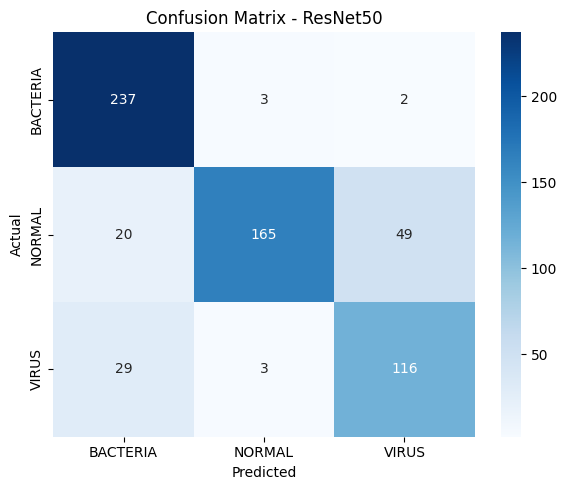

In [28]:
# Lấy dự đoán và nhãn thật
y_true = test_gen.classes
y_pred = np.argmax(model_resnet.predict(test_gen), axis=1)
labels = list(test_gen.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=labels)
print("\nClassification Report:\n", report)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ResNet50')
plt.tight_layout()
plt.show()

## EfficientB3

In [29]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [30]:
# Lấy file từ thư mục train
normal_dir = os.path.join(url_train, "NORMAL")
bacteria_dir = os.path.join(url_train, "bacteria")
virus_dir = os.path.join(url_train, "virus")

normal_files = [os.path.join(normal_dir, f) for f in os.listdir(normal_dir)]
bacteria_files = [os.path.join(bacteria_dir, f) for f in os.listdir(bacteria_dir)]
virus_files = [os.path.join(virus_dir, f) for f in os.listdir(virus_dir)]

# Gắn nhãn cho từng ảnh
all_filepaths = normal_files + bacteria_files + virus_files
all_labels = (
    ["NORMAL"] * len(normal_files)
    + ["BACTERIA"] * len(bacteria_files)
    + ["VIRUS"] * len(virus_files)
)

# Chia train / val (80/20)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    all_filepaths, all_labels, test_size=0.2, stratify=all_labels, random_state=42
)

# Tạo DataFrame
train_df = pd.DataFrame({'filepath': train_paths, 'label': train_labels})
val_df = pd.DataFrame({'filepath': val_paths, 'label': val_labels})

# Tạo test_df
normal_test = [os.path.join(url_test, "NORMAL", f) for f in os.listdir(os.path.join(url_test, "NORMAL"))]
bacteria_test = [os.path.join(url_test, "bacteria", f) for f in os.listdir(os.path.join(url_test, "bacteria"))]
virus_test = [os.path.join(url_test, "virus", f) for f in os.listdir(os.path.join(url_test, "virus"))]

test_df = pd.DataFrame({
    'filepath': normal_test + bacteria_test + virus_test,
    'label': (
        ['NORMAL'] * len(normal_test)
        + ['BACTERIA'] * len(bacteria_test)
        + ['VIRUS'] * len(virus_test)
    )
})

# Kiểm tra phân bố
print("Train/Val/Test phân bổ")
print(train_df['label'].value_counts(), "\n")
print(val_df['label'].value_counts(), "\n")
print(test_df['label'].value_counts())

Train/Val/Test phân bổ
label
BACTERIA    2024
VIRUS       1076
NORMAL      1072
Name: count, dtype: int64 

label
BACTERIA    506
NORMAL      269
VIRUS       269
Name: count, dtype: int64 

label
BACTERIA    242
NORMAL      234
VIRUS       148
Name: count, dtype: int64


In [31]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.25,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True
)



val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    class_weights = {'NORMAL': 1.2, 'BACTERIA': 0.8, 'VIRUS': 2.0}
)


val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = val_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 4172 validated image filenames belonging to 3 classes.
Found 1044 validated image filenames belonging to 3 classes.
Found 624 validated image filenames belonging to 3 classes.


In [32]:
print("\nGIAI ĐOẠN 1: FEATURE EXTRACTION")

base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)
output = Dense(3, activation='softmax')(x)

model_effb3 = Model(inputs=base_model.input, outputs=output)

model_effb3.compile(
    optimizer=Adam(learning_rate=3e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
    metrics=['accuracy']
)

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_lr=1e-6)
early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

class_weights = {'NORMAL': 1.2, 'BACTERIA': 0.8, 'VIRUS': 2.0}
history_e1 = model_effb3.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=[lr_reducer, early_stopper],
    class_weight=class_weights
)



GIAI ĐOẠN 1: FEATURE EXTRACTION
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 159s 903ms/step - accuracy: 0.4806 - loss: 1.0649 - val_accuracy: 0.7107 - val_loss: 0.8299 - learning_rate: 3.0000e-05
Epoch 2/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 87s 661ms/step - accuracy: 0.6040 - loss: 0.8865 - val_accuracy: 0.7328 - val_loss: 0.7561 - learning_rate: 3.0000e-05
Epoch 3/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 88s 675ms/step - accuracy: 0.6376 - loss: 0.8281 - val_accuracy: 0.7452 - val_loss: 0.7248 - learning_rate: 3.0000e-05
Epoch 4/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 87s 662ms/step - accuracy: 0.6871 - loss: 0.7675 - val_accuracy: 0.7529 - val_loss: 0.7036 - learning_rate: 3.0000e-05
Epoch 5/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 87s 662ms/step - accuracy: 0.6964 - loss: 0.7581 - val_accuracy: 0.7452 - val_loss: 0.6948 - learning_rate: 3.0000e-05
Epoch 6/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 90s 689ms/step - accuracy: 0.7072 - loss: 0.7297 - val_accuracy: 0.7529 - val_lo

In [ ]:
print("\nGIAI ĐOẠN 2: FINE-TUNING")
base_model.trainable = True  # Mở toàn bộ backbone trước
for layer in base_model.layers[:-150]:
    layer.trainable = False   # Rồi khóa lại phần đầu


model_effb3.compile(
    optimizer=Adam(learning_rate=5e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


trainable_layers = sum([layer.trainable for layer in base_model.layers])
print(f"Số layer thực sự trainable: {trainable_layers}/{len(base_model.layers)}")

history_e2 = model_effb3.fit(
    train_gen,
    epochs=EPOCHS,
    initial_epoch=history_e1.epoch[-1] + 1,
    validation_data=val_gen,
    callbacks=[lr_reducer, early_stopper]
)

In [33]:
test_loss, test_acc = model_effb3.evaluate(test_gen)
print(f"\nĐộ chính xác trên tập test (EfficientNetB3): {test_acc*100:.2f}%")
print(f"Mất mát: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 583ms/step - accuracy: 0.8610 - loss: 0.5435

Độ chính xác trên tập test (EfficientNetB3): 82.21%
Mất mát: 0.5858


20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 703ms/step

Classification Report:
               precision    recall  f1-score   support

    BACTERIA       0.76      0.98      0.85       242
      NORMAL       0.94      0.85      0.89       234
       VIRUS       0.77      0.53      0.63       148

    accuracy                           0.82       624
   macro avg       0.82      0.79      0.79       624
weighted avg       0.83      0.82      0.81       624



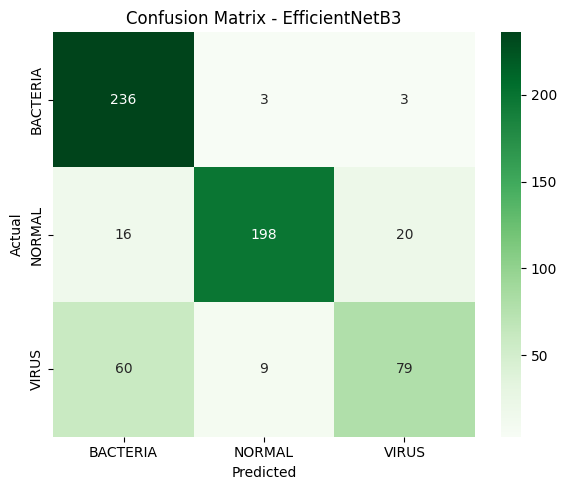

In [34]:
y_true = test_gen.classes
y_pred = np.argmax(model_effb3.predict(test_gen), axis=1)
labels = list(test_gen.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=labels)
print("\nClassification Report:\n", report)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - EfficientNetB3')
plt.tight_layout()
plt.show()

In [35]:
save_path = "EfficientNetB3_pneumonia.keras"
model_effb3.save(save_path)
print(f"Model đã được lưu tại: {os.path.abspath(save_path)}")

Model đã được lưu tại: /kaggle/working/EfficientNetB3_pneumonia.keras
